In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
initial = np.fromfile('initialAverageSpectrum.data', dtype=np.double)
final = np.fromfile('finalAverageSpectrum.data', dtype=np.double)

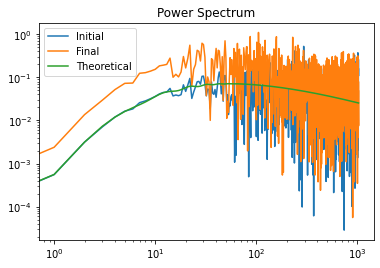

In [11]:
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum')
plt.loglog(initial, label='Initial')
plt.loglog(final, label='Final')
plt.loglog(theoretical, label='Theoretical')
plt.legend()
plt.savefig('single.png')
plt.show()

In [12]:
realNum = 1
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
spec = [None]*11
for i in range(11):
	spec[i] = np.zeros(len(theoretical))
	for b in range(realNum):
		realisation = np.fromfile(
			'Data/' + str(b) + 'spec' + str(i * 100) + '.data', dtype=np.double)
		for s in range(len(realisation)):
			spec[i][s] += realisation[s]
	spec[i] = spec[i] / realNum

In the previous graph it can be seen that the power spectrum for high frequencies increases, reaching a value around twice the theoretical one. This is due to the aliasing effect with the next image of the spectrum

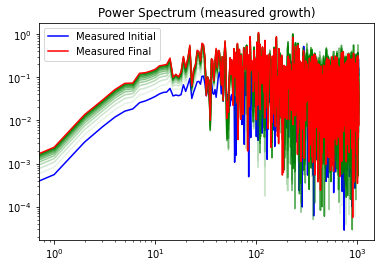

In [13]:
initial = spec[0]
final = spec[-1]
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum (measured growth)')
plt.loglog(initial, label='Measured Initial', c='blue')
for i in range(1, len(spec)-1):
	spec[i][0] = 0.0
	plt.loglog(spec[i], c='green', alpha=i*0.1)
plt.loglog(final, label='Measured Final', c='red')
plt.legend()
plt.savefig('measured.jpg')
plt.show()


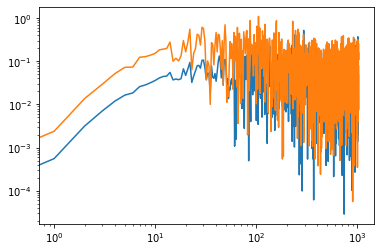

In [9]:
realisation = np.fromfile('Data/0spec0.data', dtype=np.double)
realFinal = np.fromfile('Data/0spec1000.data', dtype=np.double)
realisation[0] = 0
realFinal[0] = 0
plt.figure()
plt.loglog(realisation)
plt.loglog(realFinal)
#plt.loglog(spec[-1])
#plt.loglog(spec[0])
plt.show()
